## Data Preparation


นำเข้า Data จาก Kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(f'Shape of the data: {df.shape}')
print(f'มี {df.shape[0]} แถวของข้อมูล.')
print(f'มี {df.shape[1]} คอลัมน์ของข้อมูล.')

Shape of the data: (1338, 7)
มี 1338 แถวของข้อมูล.
มี 7 คอลัมน์ของข้อมูล.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


เช็คค่า Null

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

num_duplicate_rows = len(df[df.duplicated()])
print(f"จำนวนข้อมูลซ้ำ: {num_duplicate_rows}")

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
จำนวนข้อมูลซ้ำ: 1


In [ ]:
#ลบ row ที่ duplicate
df = df.drop_duplicates()

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

num_duplicate_rows = len(df[df.duplicated()])
print(f"จำนวนข้อมูลซ้ำ: {num_duplicate_rows}")

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
จำนวนข้อมูลซ้ำ: 0


In [ ]:
import numpy as np
for col in df.columns:
    if df[col].dtype in [np.dtype('int64'), np.dtype('float64')]:
        print(f"Column '{col}': Min={df[col].min()}, Max={df[col].max()}")

Column 'age': Min=18, Max=64
Column 'bmi': Min=15.96, Max=53.13
Column 'children': Min=0, Max=5
Column 'charges': Min=1121.8739, Max=63770.42801


# EDA-Exploratory Data Analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


<function matplotlib.pyplot.show(close=None, block=None)>

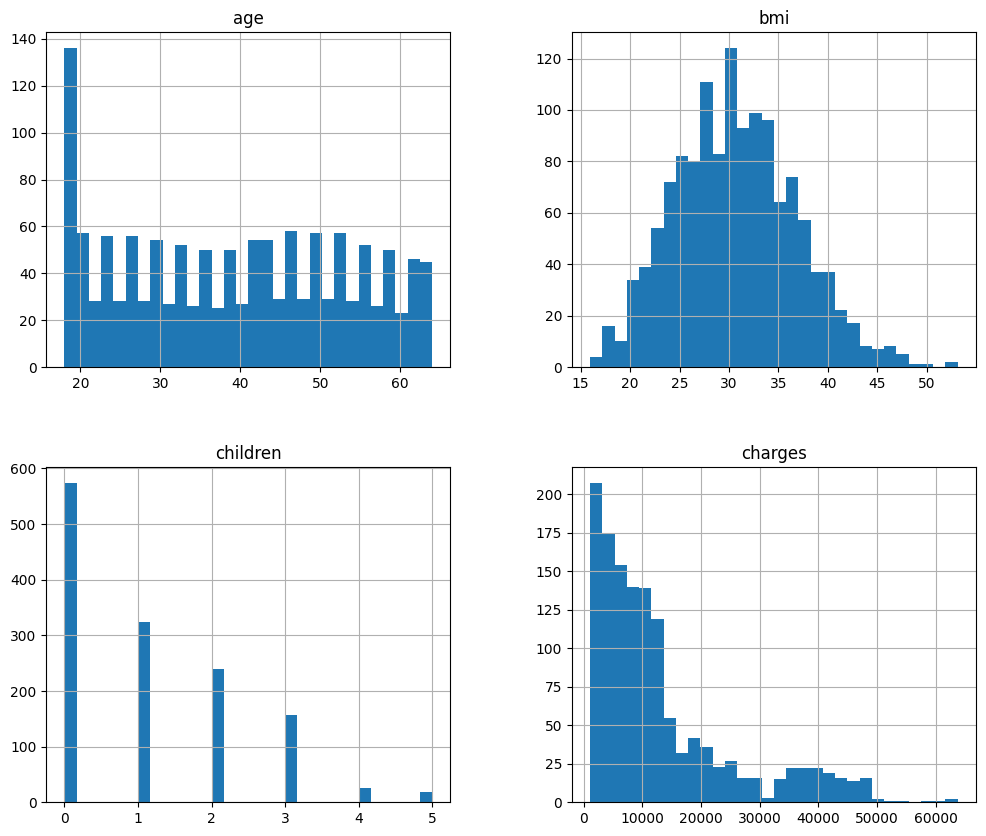

In [ ]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(12,10))
plt.show

<ipython-input-12-e1bee1461376>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df , palette='Pastel1')


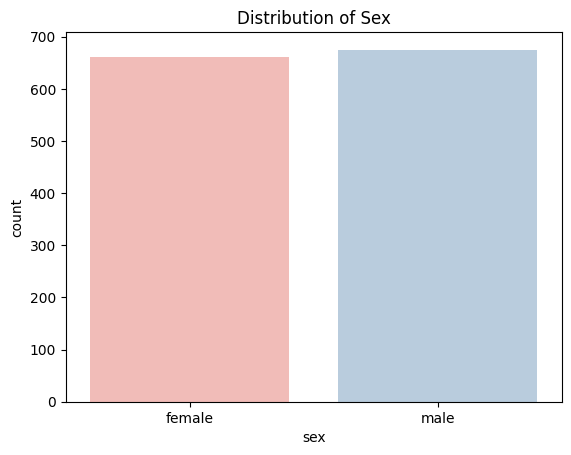

In [ ]:

sns.countplot(x='sex', data=df , palette='Pastel1')
plt.title('Distribution of Sex')
plt.show()


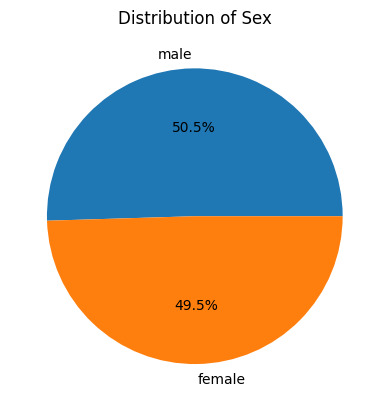

In [ ]:

sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Sex')
plt.show()


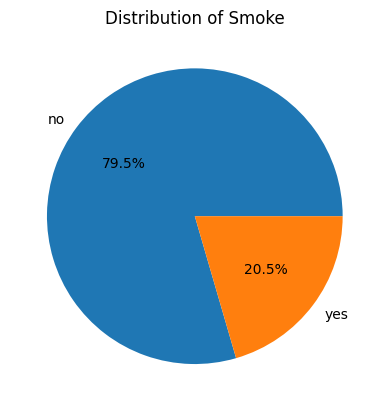

In [ ]:
smoke_counts = df['smoker'].value_counts()
plt.pie(smoke_counts, labels=smoke_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Smoke')
plt.show()


<Axes: xlabel='smoker', ylabel='count'>

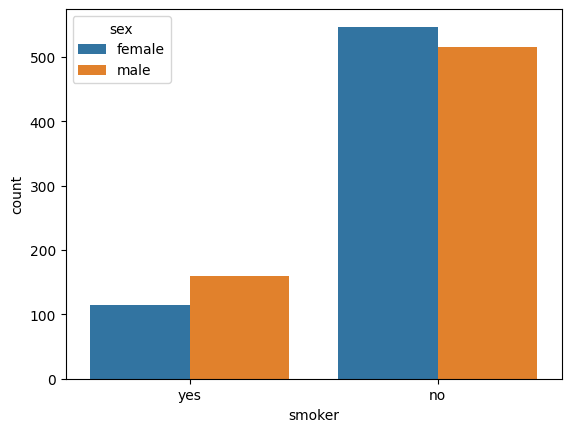

In [ ]:
sns.countplot(x = 'smoker', hue = 'sex', data = df)

In [ ]:
df['charges'].groupby(df['smoker']).mean()

,charges
smoker,
no,8440.660307
yes,32050.231832


In [ ]:
df.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    516  516       516     516      516
yes    female  115  115       115     115      115
       male    159  159       159     159      159

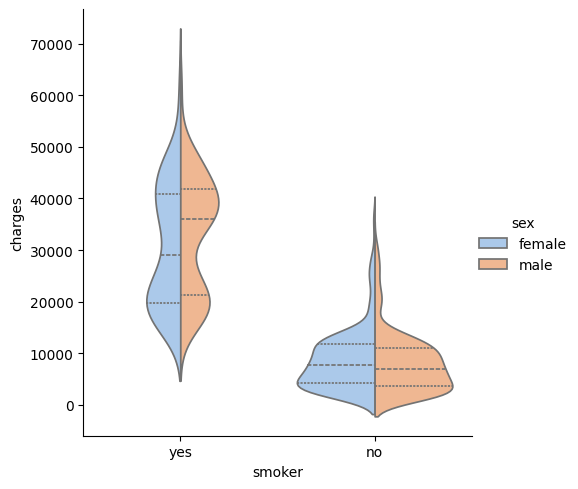

In [ ]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=df);

<ipython-input-19-23cdedc4271d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'region', data = df ,palette='Pastel1')


<Axes: xlabel='region', ylabel='count'>

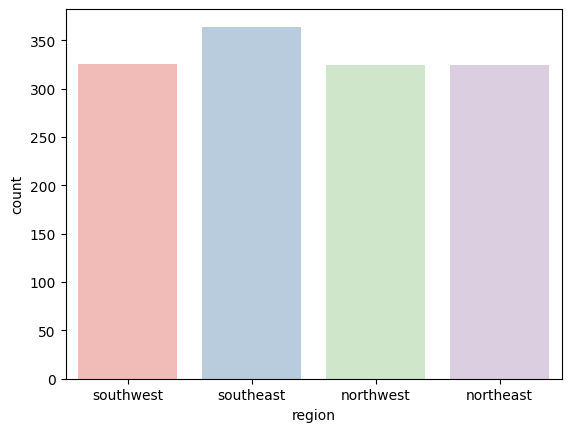

In [ ]:
sns.countplot(x = 'region', data = df ,palette='Pastel1')

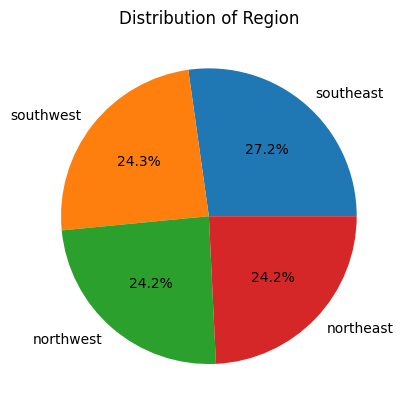

In [ ]:
region_counts = df['region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Region')
plt.show()


<ipython-input-21-a45f5842ea57>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'children', data = df ,palette='Pastel1')


<Axes: xlabel='children', ylabel='count'>

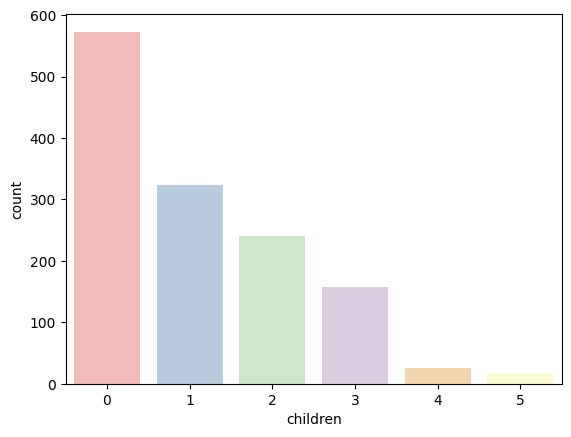

In [ ]:
sns.countplot(x = 'children', data = df ,palette='Pastel1')

แปลง Category เป็นเลข

In [ ]:
for x in ['sex', 'children', 'smoker', 'region']:
    df[x] = df[x].astype('category')

df.dtypes

,0
age,int64
sex,category
bmi,float64
children,category
smoker,category
region,category
charges,float64


In [ ]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,category
smoker,category
region,category
charges,float64


In [ ]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


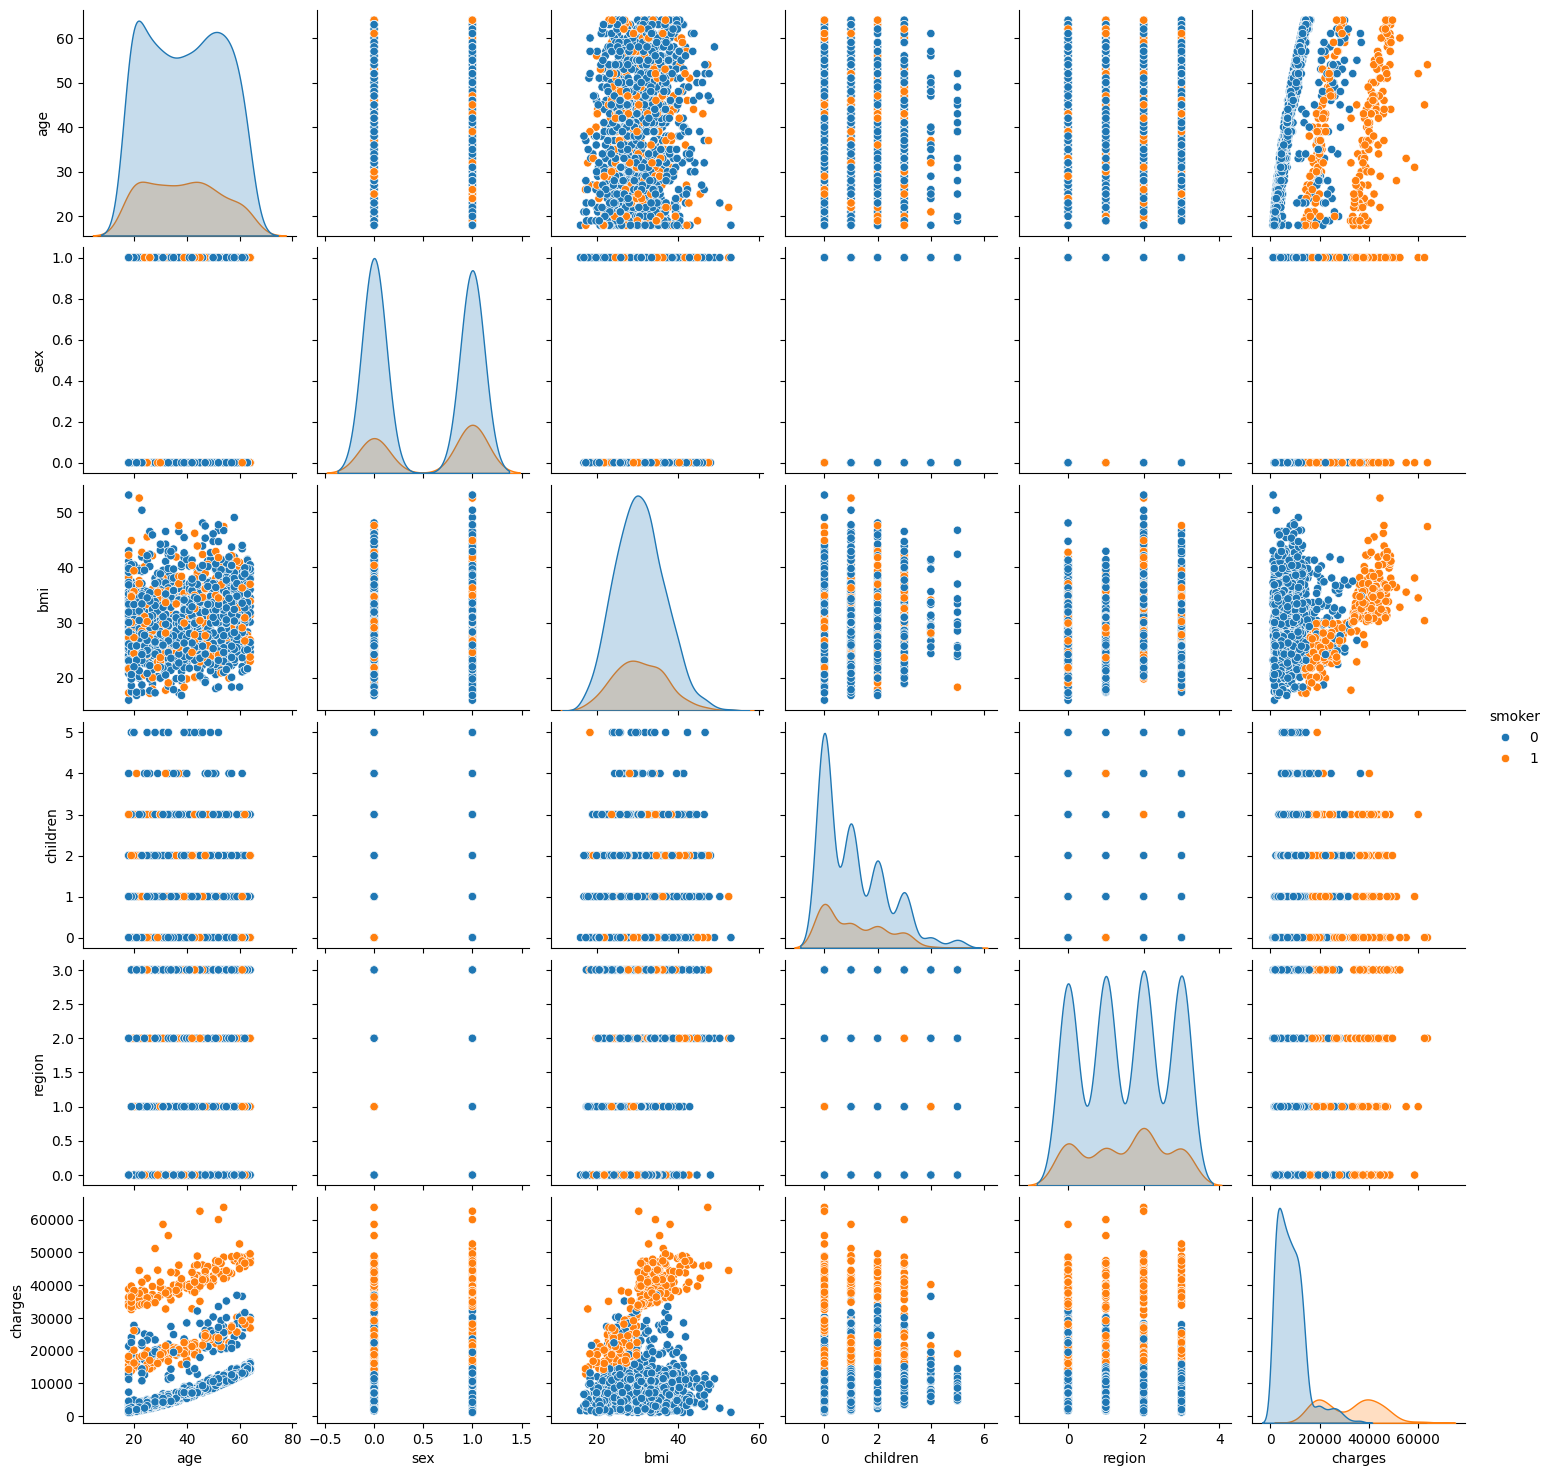

In [ ]:
sns.pairplot(df, hue  = 'smoker')

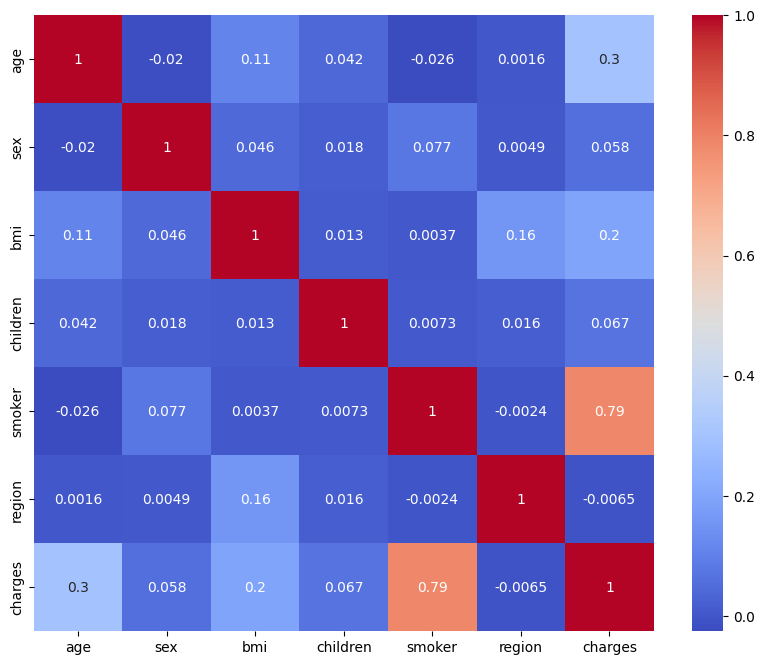

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()


ข้อมูลที่มีผลกับเบี้ยประกันมากที่สุดคือ
*   การสูบบุหรี่
*   อายุ
*   Bmi



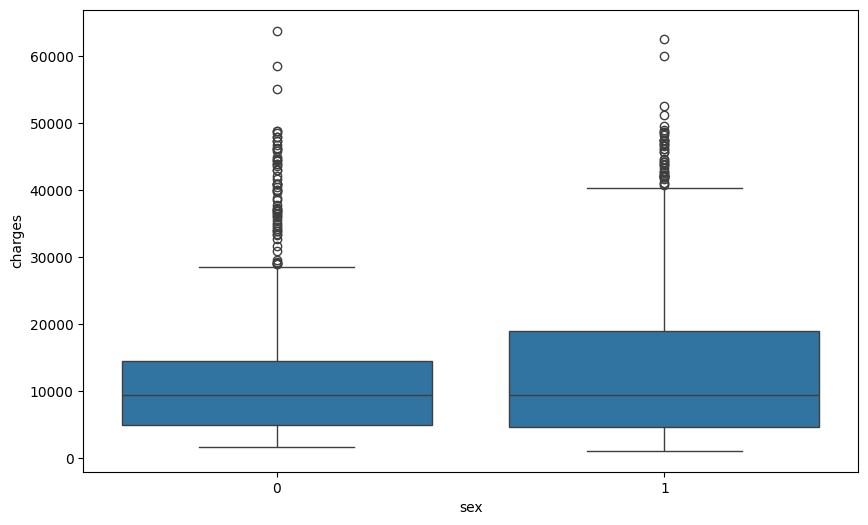

In [ ]:
# prompt: plot box

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.show()


# Spit Data


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


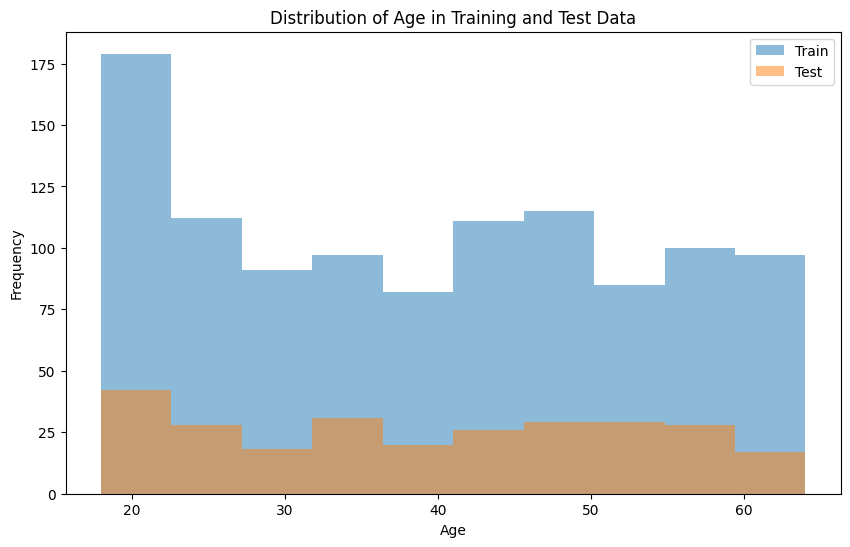

In [ ]:
import matplotlib.pyplot as plt
# Assuming X_train, X_test, y_train, y_test are already defined

# Visualize training and test data for a specific feature, e.g., 'age'
plt.figure(figsize=(10, 6))
plt.hist(X_train['age'], alpha=0.5, label='Train')
plt.hist(X_test['age'], alpha=0.5, label='Test')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Age in Training and Test Data')
plt.show()


# Model

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linear_reg_pipeline.fit(X_train, y_train)

pred_linear_reg = linear_reg_pipeline.predict(X_test)

Evaluate

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred_linear_reg)
mae = mean_absolute_error(y_test, pred_linear_reg)
r2score = r2_score(y_test, pred_linear_reg)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R squared: {r2score}")

Mean Squared Error: 34679697.13656235
Mean Absolute Error: 4295.957672702155
R squared: 0.7317858749256239


<ipython-input-20-3370de412a63>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


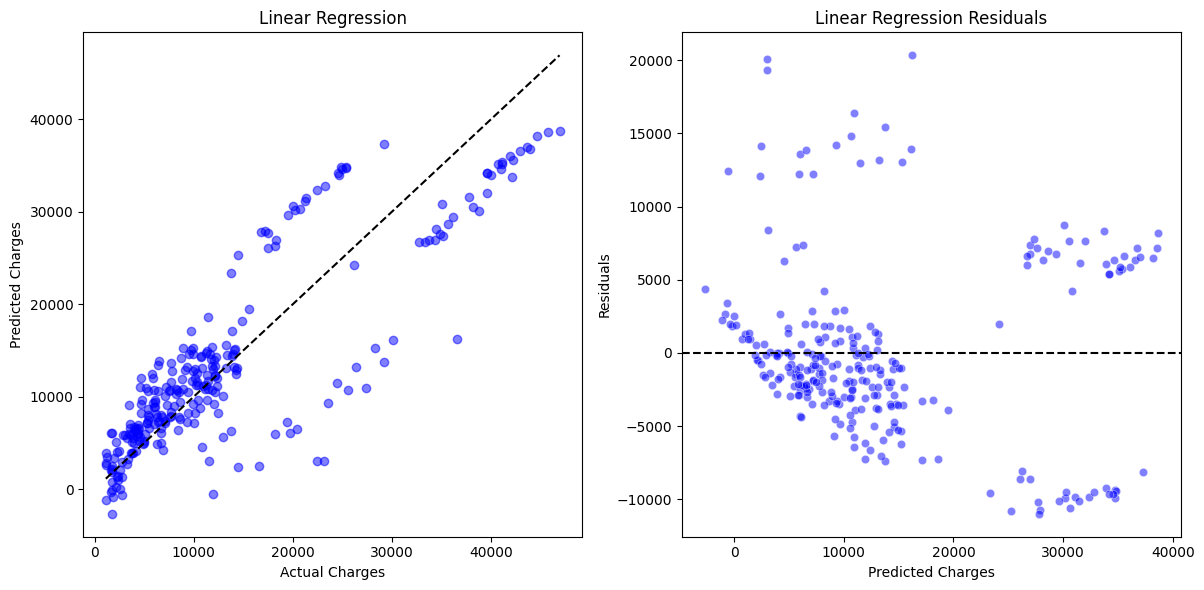

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, pred_linear_reg, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=pred_linear_reg, y=y_test - pred_linear_reg, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Get coefficients and intercept
coefficients = linear_reg_pipeline.named_steps['model'].coef_
intercept = linear_reg_pipeline.named_steps['model'].intercept_

# Get feature names after one-hot encoding
feature_names = numerical_cols + list(linear_reg_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Create the formula string
formula = "Charges = {:.2f} + ".format(intercept)
for feature, coef in zip(feature_names, coefficients):
    formula += "{:.2f} * {} + ".format(coef, feature)

# Remove the trailing " + "
formula = formula[:-3]

print(formula)


Charges = 9092.85 + 3678.38 * age + 2178.17 * bmi + 643.03 * children + -378.86 * sex_male + 23965.50 * smoker_yes + -301.33 * region_northwest + -1061.40 * region_southeast + -735.18 * region_southwest


In [ ]:
import pandas as pd
# Example :
new_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25],
    'children': [0],
    'smoker': ['no'],
    'region': ['southwest']
})


new_data_processed = preprocessor.transform(new_data)


predicted_charges = linear_reg_pipeline.predict(new_data)

print(f"Predicted charges for the new data: {predicted_charges[0]:.2f}")

Predicted charges for the new data: 2976.38


In [ ]:
import joblib
joblib.dump(linear_reg_pipeline, 'linear_model.pkl')


['linear_model.pkl']

2. Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

poly_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

param_grid_poly = {
    'poly__degree': [2, 3, 4],
    'poly__include_bias': [True, False],
    'model__fit_intercept': [True, False]
}

grid_search_poly = GridSearchCV(poly_reg_pipeline, param_grid_poly, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_poly.fit(X_train, y_train)

best_poly_model = grid_search_poly.best_estimator_
poly_predictions = best_poly_model.predict(X_test)

In [ ]:
mse_poly = mean_squared_error(y_test, poly_predictions)
mae_poly = mean_absolute_error(y_test, poly_predictions)
r2_poly = r2_score(y_test, poly_predictions)

print(f"Best Polynomial Regression Model Parameters: {grid_search_poly.best_params_}")
print(f"Best Score for Polynomial Regression: {-grid_search_poly.best_score_}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")
print(f"R squared: {r2_poly}")

Best Polynomial Regression Model Parameters: {'model__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True}
Best Score for Polynomial Regression: 23482119.063729603
Mean Squared Error: 25453550.89357596
Mean Absolute Error: 3087.579196979984
R squared: 0.8031412484349824


<ipython-input-29-1119b684e372>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


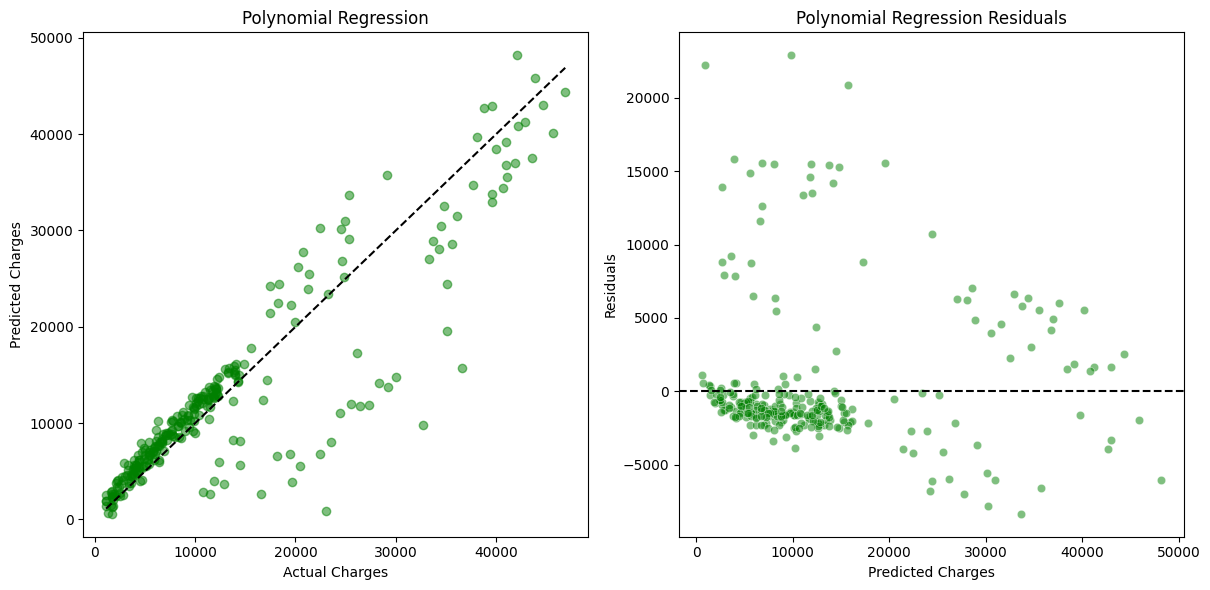

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, poly_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=poly_predictions, y=y_test - poly_predictions, color='green', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Get coefficients and intercept
coefficients = best_poly_model.named_steps['model'].coef_
intercept = best_poly_model.named_steps['model'].intercept_

# Get feature names after polynomial transformation
poly_feature_names = best_poly_model.named_steps['poly'].get_feature_names_out(input_features=numerical_cols + list(best_poly_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)))

# Create the formula string
formula = "Charges = {:.2f} + ".format(intercept)
for feature, coef in zip(poly_feature_names, coefficients):
    formula += "{:.2f} * {} + ".format(coef, feature)

# Remove the trailing " + "
formula = formula[:-3]

print(formula)


Charges = 9373.63 + -0.00 * 1 + 2943.90 * age + 649.00 * bmi + 1174.01 * children + -510.42 * sex_male + 11688.03 * smoker_yes + -433.34 * region_northwest + -690.05 * region_southeast + -770.90 * region_southwest + 694.72 * age^2 + -7.49 * age bmi + -156.26 * age children + 377.37 * age sex_male + -86.08 * age smoker_yes + 350.29 * age region_northwest + 796.62 * age region_southeast + 1126.61 * age region_southwest + -214.29 * bmi^2 + 87.64 * bmi children + -178.81 * bmi sex_male + 9245.41 * bmi smoker_yes + -100.64 * bmi region_northwest + -897.86 * bmi region_southeast + -795.83 * bmi region_southwest + -160.32 * children^2 + 33.03 * children sex_male + -431.46 * children smoker_yes + 283.19 * children region_northwest + -411.87 * children region_southeast + -324.47 * children region_southwest + -510.42 * sex_male^2 + -232.48 * sex_male smoker_yes + 347.65 * sex_male region_northwest + 947.48 * sex_male region_southeast + 310.30 * sex_male region_southwest + 11688.03 * smoker_yes^2

In [ ]:
import joblib

joblib.dump(best_poly_model, 'poly_model.pkl')


['poly_model.pkl']

In [ ]:

loaded_linear_model = joblib.load('linear_model.pkl')

loaded_poly_model = joblib.load('poly_model.pkl')


In [ ]:
new_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25],
    'children': [0],
    'smoker': ['no'],
    'region': ['southwest']
})

new_data_processed = loaded_poly_model.named_steps['preprocessor'].transform(new_data)

new_data_poly = loaded_poly_model.named_steps['poly'].transform(new_data_processed)

predicted_charges = loaded_poly_model.named_steps['model'].predict(new_data_poly)

print(f"Predicted Charges: {predicted_charges[0]}")

Predicted Charges: 3681.3195243726677


In [ ]:
import pandas as pd

new_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25],
    'children': [0],
    'smoker': ['no'],
    'region': ['southwest']
})


new_data_processed = best_poly_model.named_steps['preprocessor'].transform(new_data)

new_data_poly = best_poly_model.named_steps['poly'].transform(new_data_processed)

predicted_charges = best_poly_model.named_steps['model'].predict(new_data_poly)

print(f"Predicted Charges: {predicted_charges[0]}")


Predicted Charges: 3681.3195243726677


[link text](https://)# 10 Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_list_linear = []
mae_list_linear = []
r2_list_linear = []

mse_list_poly = []
mae_list_poly = []
r2_list_poly = []


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linear_reg_pipeline.fit(X_train, y_train)

pred_linear_reg = linear_reg_pipeline.predict(X_test)

In [ ]:

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

import numpy as np
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    linear_reg_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    linear_reg_pipeline.fit(X_train, y_train)
    y_pred_linear = linear_reg_pipeline.predict(X_test)
    accuracy_linear = r2_score(y_test, y_pred_linear)
    r2_list_linear.append(accuracy_linear)

    mse_linear = mse(y_test, y_pred_linear)
    mse_list_linear.append(mse_linear)

    mae_linear = mae(y_test, y_pred_linear)
    mae_list_linear.append(mae_linear)

    # Polynomial Regression
    poly_reg_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', LinearRegression())
    ])
    poly_reg_pipeline.fit(X_train, y_train)
    y_pred_poly = poly_reg_pipeline.predict(X_test)
    accuracy_poly = r2_score(y_test, y_pred_poly)
    r2_list_poly.append(accuracy_poly)

    mse_poly = mse(y_test, y_pred_poly)
    mse_list_poly.append(mse_poly)

    mae_poly = mae(y_test, y_pred_poly)
    mae_list_poly.append(mae_poly)

avg_accuracy_linear = np.mean(r2_list_linear)
avg_accuracy_poly = np.mean(r2_list_poly)

avg_mse_linear = np.mean(mse_list_linear)
avg_mse_poly = np.mean(mse_list_poly)

avg_mae_linear = np.mean(mae_list_linear)
avg_mae_poly = np.mean(mae_list_poly)

print("Average accuracy for Linear Regression:", avg_accuracy_linear)
print("Average MSE for Linear Regression:", avg_mse_linear)
print("Average MAE for Linear Regression:", avg_mae_linear)
print("Average RMSE for Linear Regression:", math.sqrt(avg_mse_linear))

print(f"\n{'*' * 80}\n")

print("Average accuracy for Polynomial Regression:", avg_accuracy_poly)
print("Average MSE for Polynomial Regression:", avg_mse_poly)
print("Average MAE for Polynomial Regression:", avg_mae_poly)
print("Average RMSE for Polynomial Regression:", math.sqrt(avg_mse_poly))

Average accuracy for Linear Regression: 0.738675115765031
Average MSE for Linear Regression: 37085145.442776784
Average MAE for Linear Regression: 4214.219115357142
Average RMSE for Linear Regression: 6089.757420684077

********************************************************************************

Average accuracy for Polynomial Regression: 0.8342987181923457
Average MSE for Polynomial Regression: 23457020.839380927
Average MAE for Polynomial Regression: 2913.0103154265903
Average RMSE for Polynomial Regression: 4843.244866758331


<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


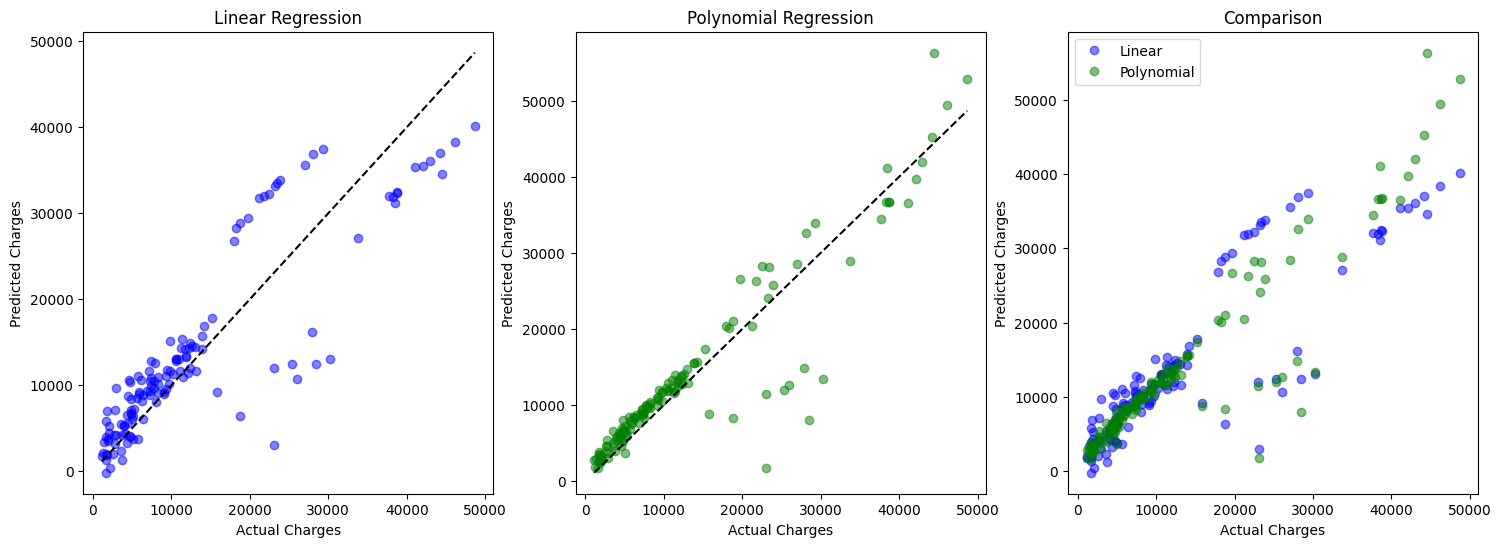

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


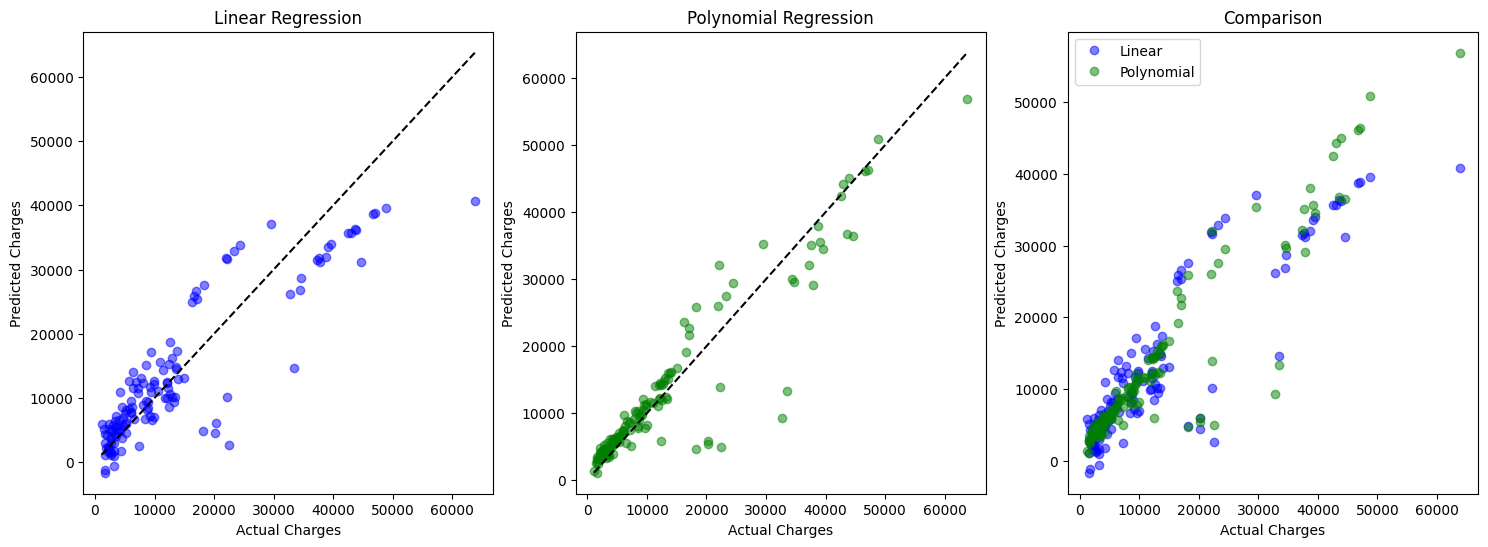

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


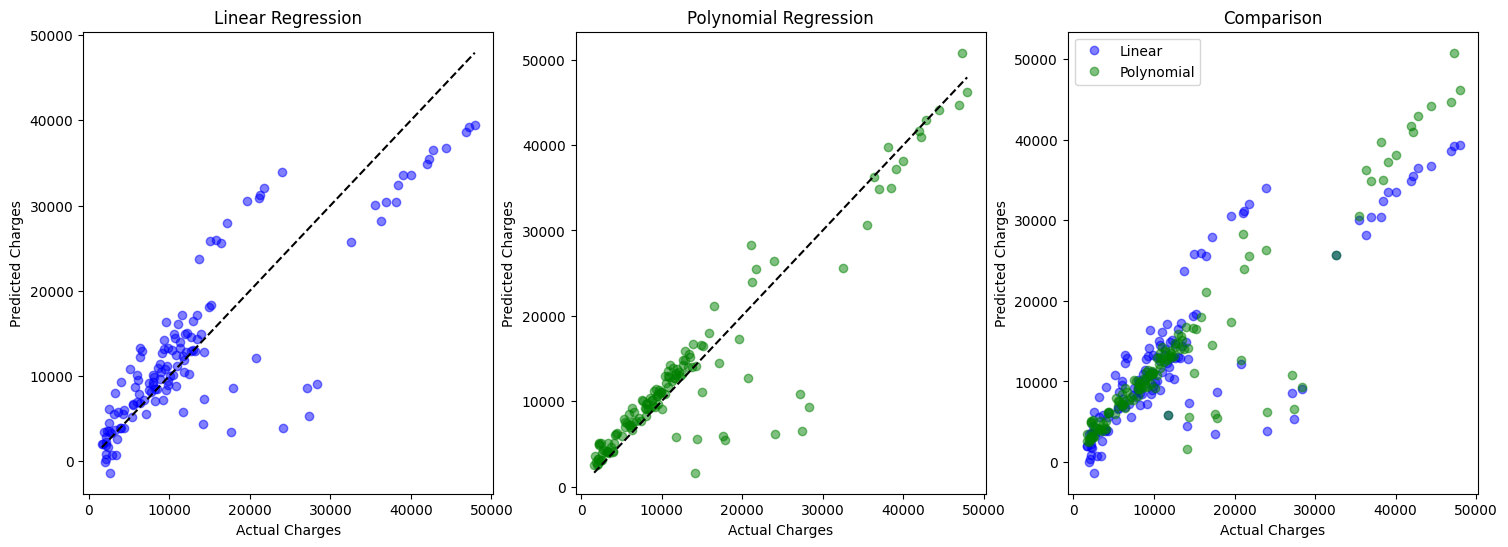

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


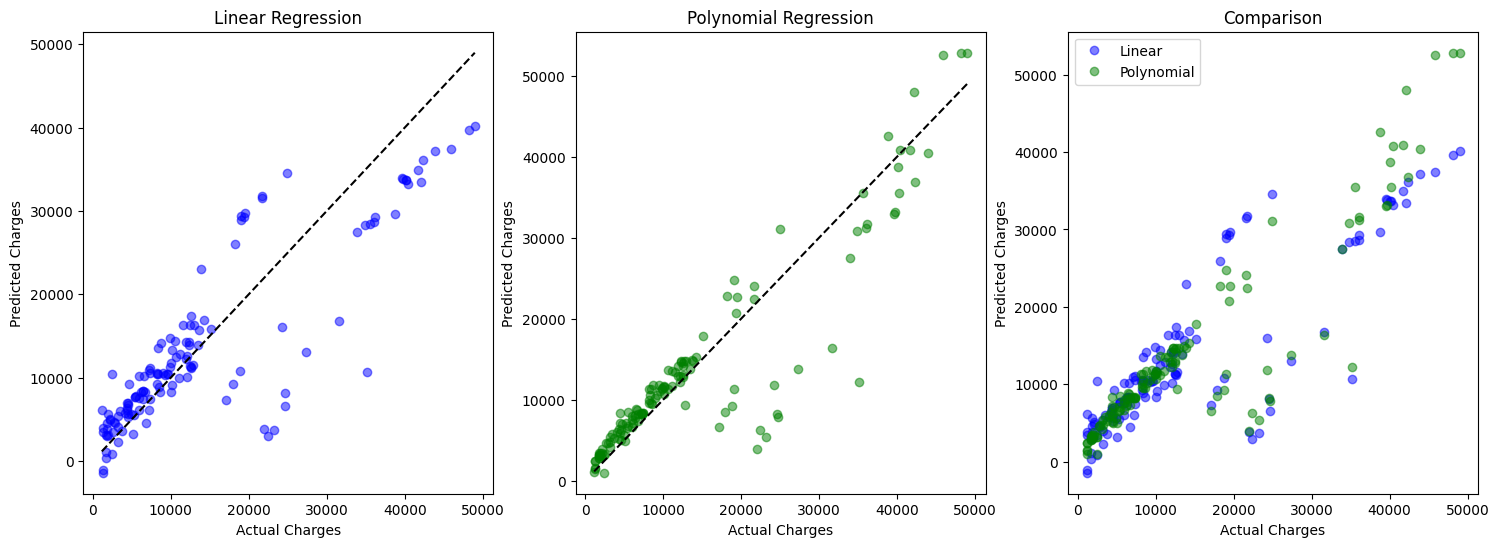

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


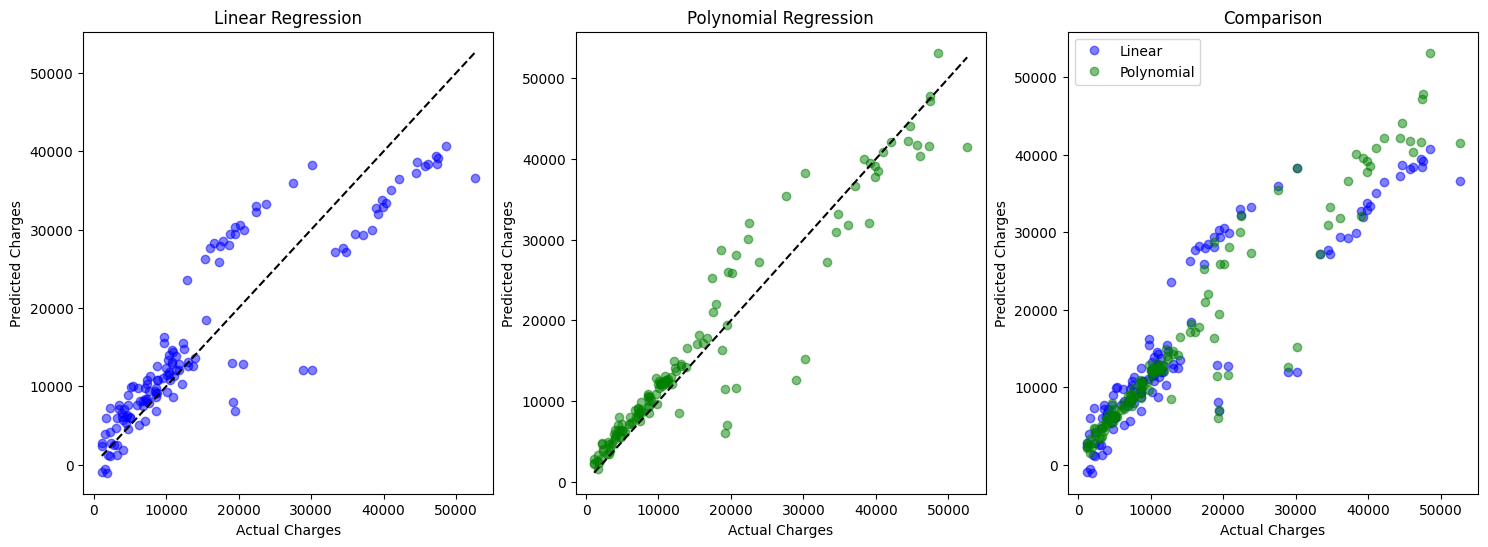

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


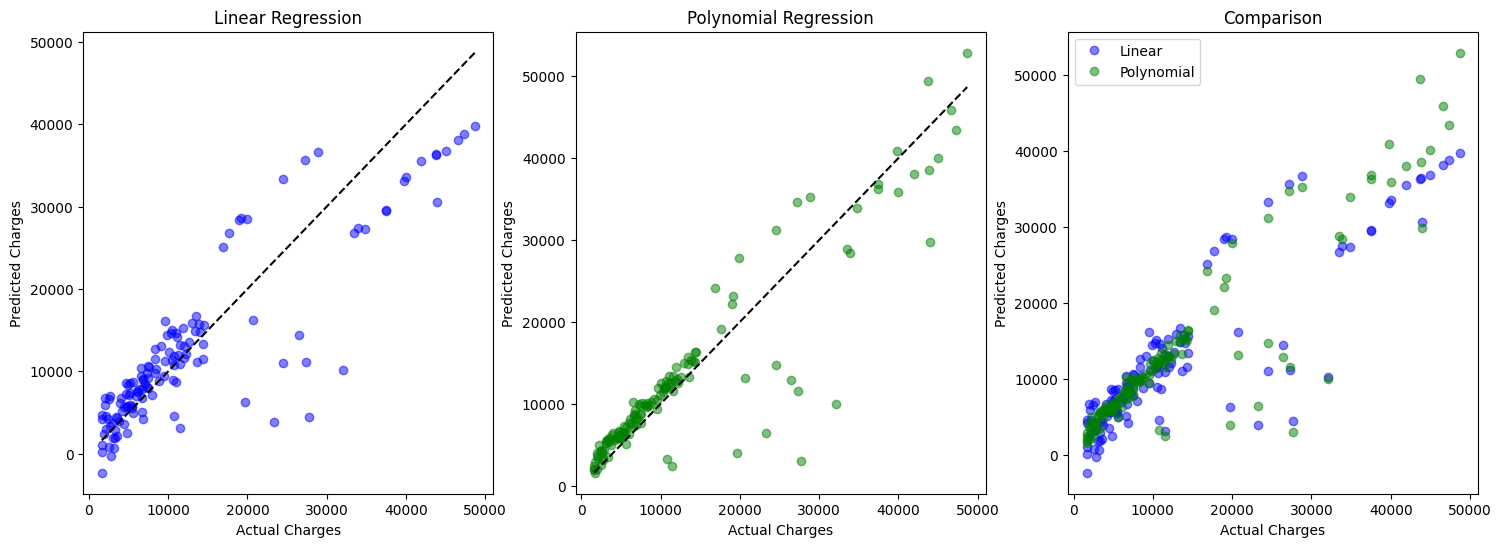

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


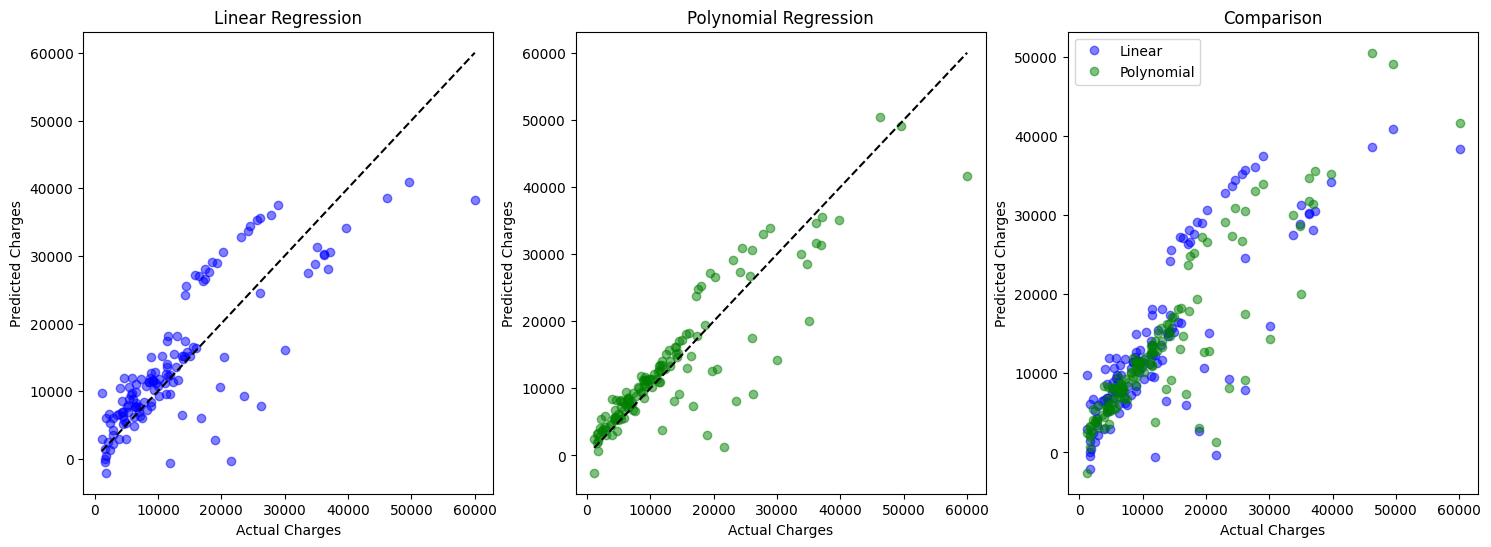

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


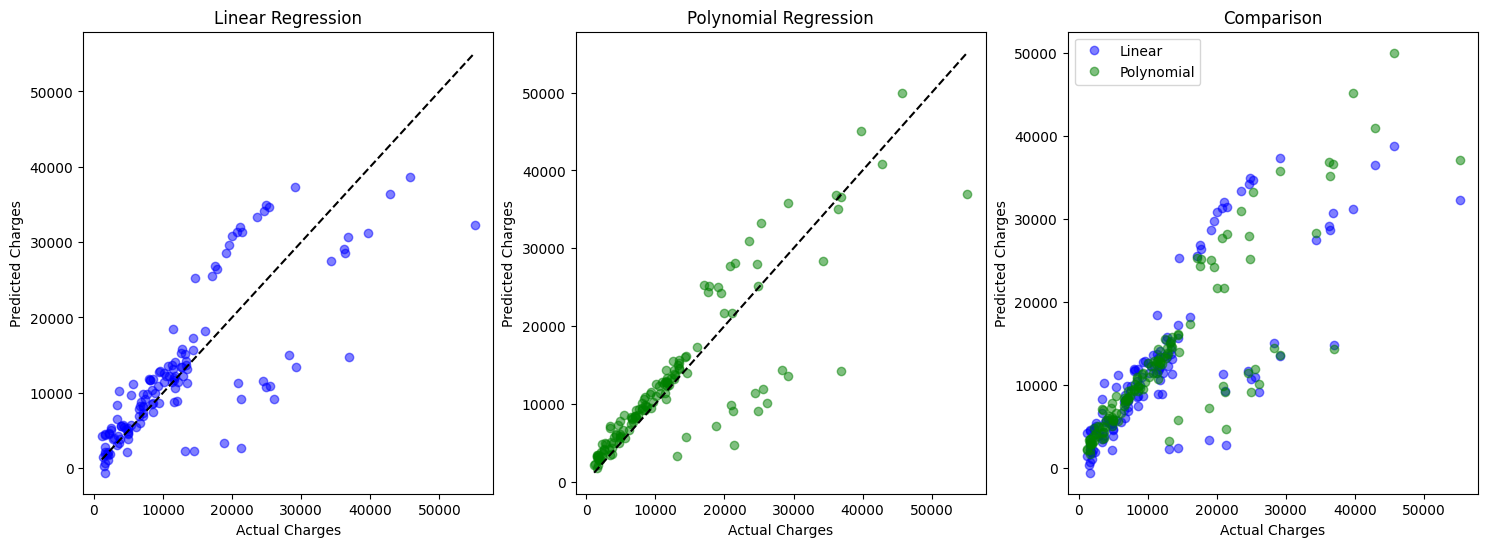

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


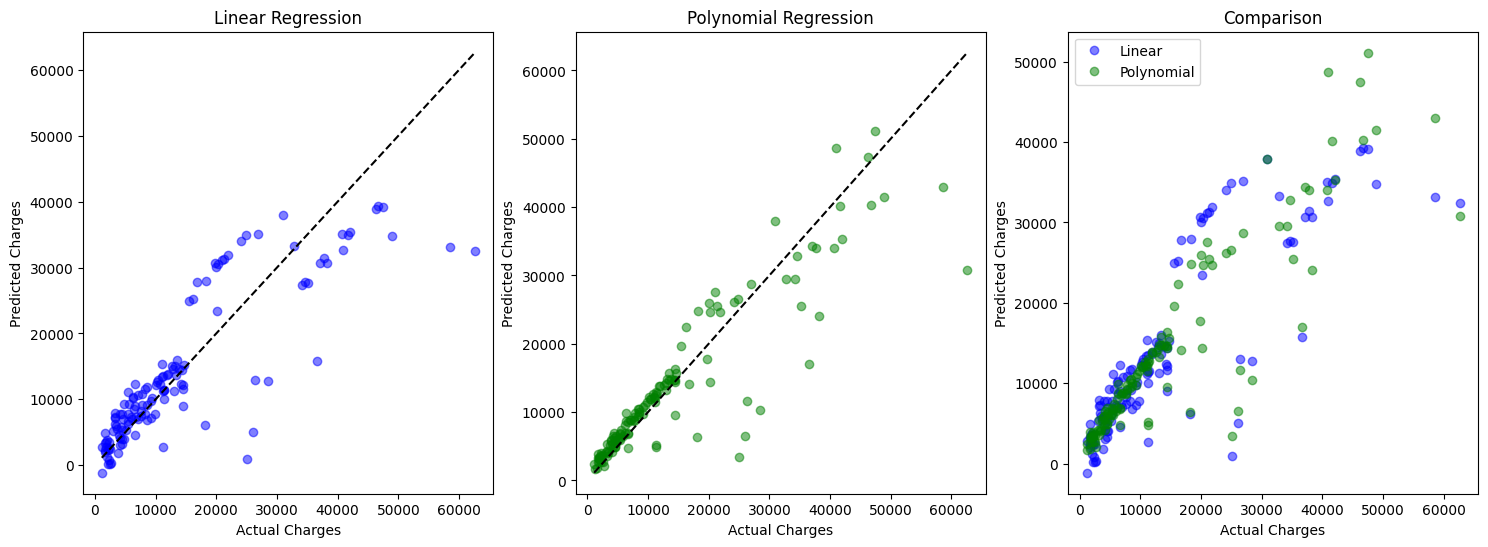

<ipython-input-63-84007bebc7f9>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-63-84007bebc7f9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


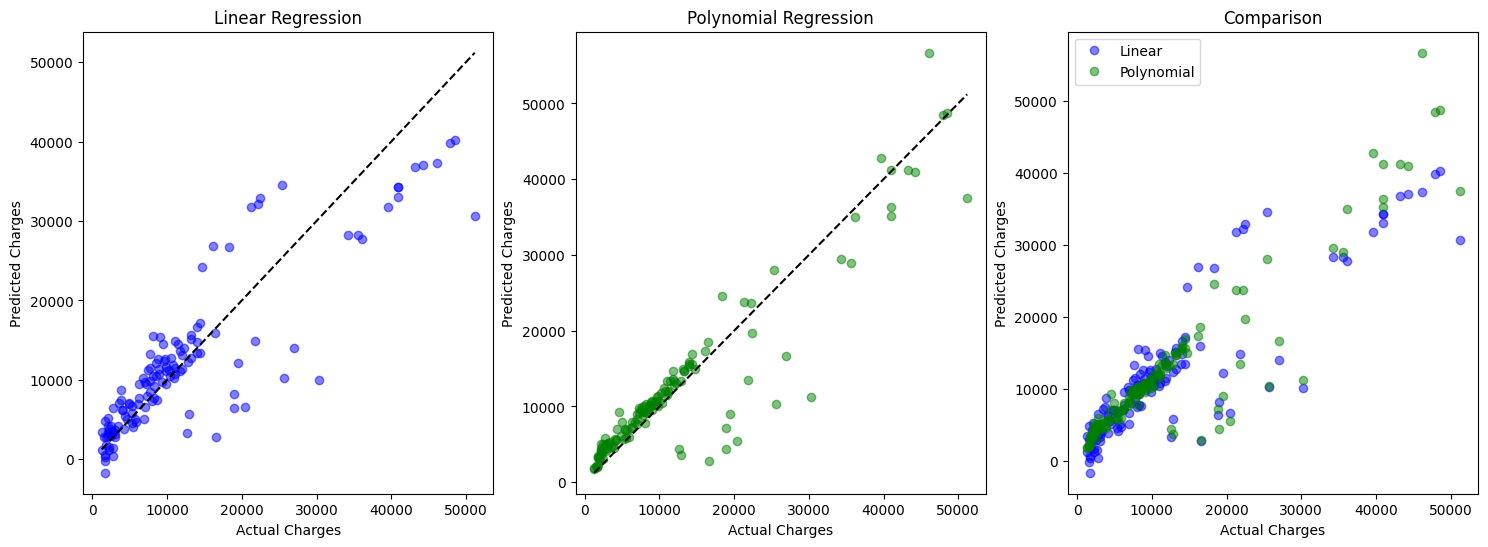

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold


kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Example KFold initialization

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    linear_reg_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    linear_reg_pipeline.fit(X_train, y_train)
    y_pred_linear = linear_reg_pipeline.predict(X_test)
    r2_list_linear.append(r2_score(y_test, y_pred_linear))
    mse_list_linear.append(mse(y_test, y_pred_linear))
    mae_list_linear.append(mae(y_test, y_pred_linear))

    # Polynomial Regression
    poly_reg_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', LinearRegression())
    ])
    poly_reg_pipeline.fit(X_train, y_train)
    y_pred_poly = poly_reg_pipeline.predict(X_test)
    r2_list_poly.append(r2_score(y_test, y_pred_poly))
    mse_list_poly.append(mse(y_test, y_pred_poly))
    mae_list_poly.append(mae(y_test, y_pred_poly))

    # Visualization for each fold
    plt.figure(figsize=(18, 6))

    # Linear Regression Visualization
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Linear Regression')

    # Polynomial Regression Visualization
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Polynomial Regression')

    # Comparing Models (Linear vs Polynomial)
    plt.subplot(1, 3, 3)
    plt.plot(y_test, y_pred_linear, 'o', color='blue', alpha=0.5, label='Linear')
    plt.plot(y_test, y_pred_poly, 'o', color='green', alpha=0.5, label='Polynomial')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Comparison')
    plt.legend()

    plt.show()


In [ ]:

final_linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
final_linear_model.fit(X, y)


final_poly_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])
final_poly_model.fit(X, y)


joblib.dump(final_linear_model, 'final_linear_model.pkl')
joblib.dump(final_poly_model, 'final_poly_model.pkl')


['final_poly_model.pkl']

In [ ]:
import pandas as pd
import joblib

# Load models
final_linear_model = joblib.load('final_linear_model.pkl')
final_poly_model = joblib.load('final_poly_model.pkl')
# Example :
new_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25],
    'children': [0],
    'smoker': ['no'],
    'region': ['southwest']
})


new_data_processed = preprocessor.transform(new_data)
predicted_charges = final_linear_model.predict(new_data)

print(f"Predict linear: {predicted_charges[0]:.2f}")

new_data_processed = final_poly_model.named_steps['preprocessor'].transform(new_data)
new_data_poly = final_poly_model.named_steps['poly'].transform(new_data_processed)
predicted_charges = final_poly_model.named_steps['model'].predict(new_data_poly)

print(f"Predict Polynomial: {predicted_charges[0]:.2f}")


Predict linear: 3155.62
Predict Polynomial: 3862.00


# **PCA**

In [ ]:
X = X.drop('region', axis=1)


In [ ]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


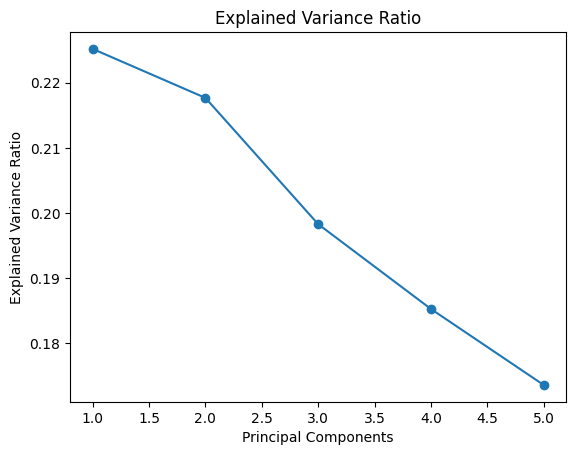

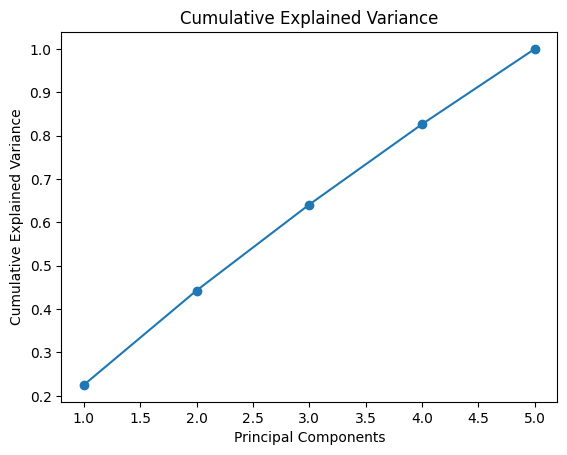

จำนวน component ที่ดีที่สุด: 5


In [ ]:
# prompt: ทำ PCA และตรวจสอบว่ากี่ conponent ดีสุด

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# สร้าง object ของ StandardScaler
scaler = StandardScaler()

# ทำ scaling ข้อมูล
X_scaled = scaler.fit_transform(X)

# สร้าง object ของ PCA
pca = PCA()

# ทำ PCA
X_pca = pca.fit_transform(X_scaled)

# ดู variance ที่อธิบายโดยแต่ละ component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# คำนวณ cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# เลือกจำนวน component ที่ต้องการ
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"จำนวน component ที่ดีที่สุด: {n_components}")
